In [1]:
import pandas as pd
import glob
import codecs
from pandas import Series, DataFrame

from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import Adam,RMSprop
from keras.utils import np_utils
from keras import optimizers,regularizers
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#圧力_温度_配管ID.csvの読み込み
data1 = pd.read_csv("drive/My Drive/mdb/test/C61/圧力_温度_配管ID.csv", encoding='shift_jis')
#配管特性.csvの読み込み
data2 = pd.read_csv('drive/My Drive/mdb/test/C61/配管特性.csv',encoding='shift_jis')
#圧力_温度_配管ID.csvのデータの配管IDに合わせて配管特性.csvのデータを結合
data1_frame = DataFrame(data1)
data2_frame = DataFrame(data2)
data12 = pd.merge(data1_frame,data2_frame,how='left',left_on='配管 ID',right_on = '配管ID')
#'To'データの削除
data12 = data12.drop("To",axis=1)
for col_name in data12.columns:
    print(col_name,data12[col_name].dtype)

#結合後のデータ種類
data12
#'配管ID'などの文字データのダミー化
data12_dummy = pd.get_dummies(data12[data12.columns[data12.columns != 'From']])
data12_dummy['From'] = data12['From']

data12_dummy
#Support.csvの読み込み
data_out = pd.read_csv("drive/My Drive/mdb/test/C61/Support.csv",encoding='shift_jis')
data_out
#使用したい "Point","Type"データのみにする
for col_name in data_out.columns:
    if col_name != "Point" and col_name != "Type" :
        data_out = data_out.drop(col_name,axis=1)
data_out
#重複しているデータの削除
data_out = data_out.drop_duplicates()
data_out
#入力データと出力データを'Point'データで結合
data_press_type = pd.merge(data12_dummy,data_out,how = "outer",left_on = 'From',right_on='Point')
data_press_type
#'Support.csv'の'type'データの確認
data_series = Series(data_press_type['Type'])
pd.Series.value_counts(data_series)
#文字データなのでダミー化
data_press_type.at[data_press_type['Type'] == "Guide",'Type'] = 1
data_press_type.at[data_press_type['Type'] == "V - Stop",'Type'] = 2
data_press_type.at[data_press_type['Type'] == "Spr. Hgr",'Type'] = 3
data_press_type.at[data_press_type['Type'] == "Inclined",'Type'] = 4
data_test_press = data_press_type.fillna(0)
data_series = Series(data_test_press['Type'])
print(pd.Series.value_counts(data_series))
data_test_c61 = data_test_press[data_test_press["呼び径 (mm)_x"] != 0]
data_test_c61

From object
材質 object
配管 ID object
呼び径 (mm)_x float64
ｹｰｽ 1 圧力 (N/mm2) float64
ｹｰｽ 1 温度 (deg C) float64
ｹｰｽ 1 自動_1 float64
ｹｰｽ 1 線膨張量 (mm/m) float64
ｹｰｽ 1 自動_2 float64
ｹｰｽ 1 運転時弾性係数 (E6 N/mm2) float64
ｹｰｽ 1 自動_3 float64
ｹｰｽ 1 運転時許容応力 (N/mm2) float64
配管ID object
ﾀｸﾞ ﾅﾝﾊﾞｰ object
呼び径 (mm)_y int64
実外径 (mm) float64
ｽｹｼﾞｭｰﾙ int64
肉厚 (mm) float64
腐れ代 (mm) float64
製作公差 (mm) float64
保温厚さ (mm) float64
保温材質 object
保温材密度 (kg/m3) float64
外装板厚 (mm) float64
外装板材質 object
外装板密度 (kg/m3) object
ﾗｲﾆﾝｸﾞ厚さ (mm) float64
ﾗｲﾆﾝｸﾞ密度 (kg/m3) object
ﾗｲﾝ ｸﾗｽ object
流体比重 float64
配管材質 object
最低温度の警告 float64
溶接E係数 float64
溶接W係数 自動 object
溶接W係数 object
応力振幅 低減係数 float64
常温時許容応力 (N/mm2) float64
最小降伏点(Sy) (N/mm2) float64
引張強さ(Su) (N/mm2) float64
縦弾性係数 (E6 N/mm2) float64
周方向弾性係数 (E6 N/mm2) float64
せん断弾性係数 (E6 N/mm2) float64
密度 (kg/m3) float64
ﾎﾟｱｿﾝ比 float64
0    60
2     4
1     3
3     2
4     1
Name: Type, dtype: int64


,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),ｽｹｼﾞｭｰﾙ,肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_STPA12-S,配管 ID_E300S120,配管 ID_P250S120,配管 ID_P350S120,配管ID_E300S120,配管ID_P250S120,配管ID_P350S120,ﾀｸﾞ ﾅﾝﾊﾞｰ_,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_EH21,配管材質_STPA12-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,300.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,300,318.5,120,25.4,0.0,3.17,150.0,201.23,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,A00,0,0
1,350.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,350,355.6,120,27.8,0.0,3.47,150.0,201.23,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,A01,0,0
2,350.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,350,355.6,120,27.8,0.0,3.47,150.0,201.23,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,A02 N,0,0
3,350.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,350,355.6,120,27.8,0.0,3.47,150.0,201.23,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,A02 F,0,0
4,350.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,350,355.6,120,27.8,0.0,3.47,150.0,201.23,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,A03 N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,250.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,250,267.4,120,21.4,0.0,2.67,140.0,201.28,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,B17,0,0
66,250.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,250,267.4,120,21.4,0.0,2.67,140.0,201.28,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,B18 N,0,0
67,250.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,250,267.4,120,21.4,0.0,2.67,140.0,201.28,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,B18 F,0,0
68,250.0,10.6,487.0,1.0,6.58,1.0,0.15,1.0,83.51,250,267.4,120,21.4,0.0,2.67,140.0,201.28,0.0,0.0,0.0,0.0,1.0,1.0,95.0,205.0,380.0,0.19,0.19,0.07,7850.0,0.3,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,B19,0,0


In [4]:
#圧力_温度_配管ID.csvの読み込み
data1 = pd.read_csv("drive/My Drive/mdb/test/L41/圧力_温度_配管ID.csv", encoding='shift_jis')
#配管特性.csvの読み込み
data2 = pd.read_csv('drive/My Drive/mdb/test/L41/配管特性.csv',encoding='shift_jis')
#圧力_温度_配管ID.csvのデータの配管IDに合わせて配管特性.csvのデータを結合
data1_frame = DataFrame(data1)
data2_frame = DataFrame(data2)
data12 = pd.merge(data1_frame,data2_frame,how='left',left_on='配管 ID',right_on = '配管ID')
#'To'データの削除
data12 = data12.drop("To",axis=1)
for col_name in data12.columns:
    print(col_name,data12[col_name].dtype)

#結合後のデータ種類
data12
#'配管ID'などの文字データのダミー化
data12_dummy = pd.get_dummies(data12[data12.columns[data12.columns != 'From']])
data12_dummy['From'] = data12['From']

data12_dummy
#Support.csvの読み込み
data_out = pd.read_csv("drive/My Drive/mdb/test/L41/Support.csv",encoding='shift_jis')
data_out
#使用したい "Point","Type"データのみにする
for col_name in data_out.columns:
    if col_name != "Point" and col_name != "Type" :
        data_out = data_out.drop(col_name,axis=1)
data_out
#重複しているデータの削除
data_out = data_out.drop_duplicates()
data_out
#入力データと出力データを'Point'データで結合
data_press_type = pd.merge(data12_dummy,data_out,how = "outer",left_on = 'From',right_on='Point')
data_press_type
#'Support.csv'の'type'データの確認
data_series = Series(data_press_type['Type'])
pd.Series.value_counts(data_series)
#文字データなのでダミー化
data_press_type.at[data_press_type['Type'] == "Guide",'Type'] = 1
data_press_type.at[data_press_type['Type'] == "V - Stop",'Type'] = 2
data_press_type.at[data_press_type['Type'] == "Spr. Hgr",'Type'] = 3
data_press_type.at[data_press_type['Type'] == "Inclined",'Type'] = 4
data_test_press = data_press_type.fillna(0)
data_series = Series(data_test_press['Type'])
print(pd.Series.value_counts(data_series))
data_test_l41 = data_test_press[data_test_press["呼び径 (mm)_x"] != 0]
data_test_l41

From object
材質 object
配管 ID object
呼び径 (mm)_x float64
ｹｰｽ 1 圧力 (N/mm2) float64
ｹｰｽ 1 温度 (deg C) float64
ｹｰｽ 1 自動_1 float64
ｹｰｽ 1 線膨張量 (mm/m) float64
ｹｰｽ 1 自動_2 float64
ｹｰｽ 1 運転時弾性係数 (E6 N/mm2) float64
ｹｰｽ 1 自動_3 float64
ｹｰｽ 1 運転時許容応力 (N/mm2) float64
配管ID object
ﾀｸﾞ ﾅﾝﾊﾞｰ object
呼び径 (mm)_y int64
実外径 (mm) float64
ｽｹｼﾞｭｰﾙ int64
肉厚 (mm) float64
腐れ代 (mm) float64
製作公差 (mm) float64
保温厚さ (mm) float64
保温材質 object
保温材密度 (kg/m3) float64
外装板厚 (mm) float64
外装板材質 object
外装板密度 (kg/m3) object
ﾗｲﾆﾝｸﾞ厚さ (mm) float64
ﾗｲﾆﾝｸﾞ密度 (kg/m3) object
ﾗｲﾝ ｸﾗｽ object
流体比重 float64
配管材質 object
最低温度の警告 float64
溶接E係数 float64
溶接W係数 自動 object
溶接W係数 object
応力振幅 低減係数 float64
常温時許容応力 (N/mm2) float64
最小降伏点(Sy) (N/mm2) float64
引張強さ(Su) (N/mm2) float64
縦弾性係数 (E6 N/mm2) float64
周方向弾性係数 (E6 N/mm2) float64
せん断弾性係数 (E6 N/mm2) float64
密度 (kg/m3) float64
ﾎﾟｱｿﾝ比 float64
0    89
1    14
2     3
4     1
3     1
Name: Type, dtype: int64


,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),ｽｹｼﾞｭｰﾙ,肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_STPG370-S,配管 ID_P300S40,配管 ID_P350S40,配管 ID_P400S40,配管 ID_P450S40,配管ID_P300S40,配管ID_P350S40,配管ID_P400S40,配管ID_P450S40,ﾀｸﾞ ﾅﾝﾊﾞｰ_,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BB21,配管材質_STPG370-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,400.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,400,406.4,40,12.7,0.0,1.58,50.0,201.35,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,A00,0,0
1,400.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,400,406.4,40,12.7,0.0,1.58,50.0,201.35,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,A01 N,0,0
2,400.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,400,406.4,40,12.7,0.0,1.58,50.0,201.35,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,A01 F,0,0
3,400.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,400,406.4,40,12.7,0.0,1.58,50.0,201.35,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,A02,0,0
4,400.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,400,406.4,40,12.7,0.0,1.58,50.0,201.35,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,A03 N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,400.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,400,406.4,40,12.7,0.0,1.58,50.0,201.35,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,F01,0,0
104,350.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,350,355.6,40,11.1,0.0,1.38,50.0,201.50,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,F02,0,0
105,350.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,350,355.6,40,11.1,0.0,1.38,50.0,201.50,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,F03,0,0
106,350.0,1.1,176.0,1.0,1.87,1.0,0.19,1.0,106.0,350,355.6,40,11.1,0.0,1.38,50.0,201.50,0.0,0.0,1.0,0.0,1.0,1.0,91.99,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,F04,0,0


In [5]:
#圧力_温度_配管ID.csvの読み込み
data1 = pd.read_csv("drive/My Drive/mdb/test/P36/圧力_温度_配管ID.csv", encoding='shift_jis')
#配管特性.csvの読み込み
data2 = pd.read_csv('drive/My Drive/mdb/test/P36/配管特性.csv',encoding='shift_jis')
#圧力_温度_配管ID.csvのデータの配管IDに合わせて配管特性.csvのデータを結合
data1_frame = DataFrame(data1)
data2_frame = DataFrame(data2)
data12 = pd.merge(data1_frame,data2_frame,how='left',left_on='配管 ID',right_on = '配管ID')
#'To'データの削除
data12 = data12.drop("To",axis=1)
for col_name in data12.columns:
    print(col_name,data12[col_name].dtype)

#結合後のデータ種類
data12
#'配管ID'などの文字データのダミー化
data12_dummy = pd.get_dummies(data12[data12.columns[data12.columns != 'From']])
data12_dummy['From'] = data12['From']

data12_dummy
#Support.csvの読み込み
data_out = pd.read_csv("drive/My Drive/mdb/test/P36/Support.csv",encoding='shift_jis')
data_out
#使用したい "Point","Type"データのみにする
for col_name in data_out.columns:
    if col_name != "Point" and col_name != "Type" :
        data_out = data_out.drop(col_name,axis=1)
data_out
#重複しているデータの削除
data_out = data_out.drop_duplicates()
data_out
#入力データと出力データを'Point'データで結合
data_press_type = pd.merge(data12_dummy,data_out,how = "outer",left_on = 'From',right_on='Point')
data_press_type
#'Support.csv'の'type'データの確認
data_series = Series(data_press_type['Type'])
pd.Series.value_counts(data_series)
#文字データなのでダミー化
data_press_type.at[data_press_type['Type'] == "Guide",'Type'] = 1
data_press_type.at[data_press_type['Type'] == "V - Stop",'Type'] = 2
data_press_type.at[data_press_type['Type'] == "Spr. Hgr",'Type'] = 3
data_press_type.at[data_press_type['Type'] == "Inclined",'Type'] = 4
data_test_press = data_press_type.fillna(0)
data_series = Series(data_test_press['Type'])
print(pd.Series.value_counts(data_series))
data_test_p36 = data_test_press[data_test_press["呼び径 (mm)_x"] != 0]
data_test_p36

From object
材質 object
配管 ID object
呼び径 (mm)_x float64
ｹｰｽ 1 圧力 (N/mm2) float64
ｹｰｽ 1 温度 (deg C) float64
ｹｰｽ 1 自動_1 float64
ｹｰｽ 1 線膨張量 (mm/m) float64
ｹｰｽ 1 自動_2 float64
ｹｰｽ 1 運転時弾性係数 (E6 N/mm2) float64
ｹｰｽ 1 自動_3 float64
ｹｰｽ 1 運転時許容応力 (N/mm2) float64
配管ID object
ﾀｸﾞ ﾅﾝﾊﾞｰ object
呼び径 (mm)_y int64
実外径 (mm) float64
ｽｹｼﾞｭｰﾙ int64
肉厚 (mm) float64
腐れ代 (mm) float64
製作公差 (mm) float64
保温厚さ (mm) float64
保温材質 object
保温材密度 (kg/m3) float64
外装板厚 (mm) float64
外装板材質 object
外装板密度 (kg/m3) object
ﾗｲﾆﾝｸﾞ厚さ (mm) float64
ﾗｲﾆﾝｸﾞ密度 (kg/m3) object
ﾗｲﾝ ｸﾗｽ object
流体比重 float64
配管材質 object
最低温度の警告 float64
溶接E係数 float64
溶接W係数 自動 object
溶接W係数 object
応力振幅 低減係数 float64
常温時許容応力 (N/mm2) float64
最小降伏点(Sy) (N/mm2) float64
引張強さ(Su) (N/mm2) float64
縦弾性係数 (E6 N/mm2) float64
周方向弾性係数 (E6 N/mm2) float64
せん断弾性係数 (E6 N/mm2) float64
密度 (kg/m3) float64
ﾎﾟｱｿﾝ比 float64
0    98
1    17
2     6
4     2
3     1
Name: Type, dtype: int64


,呼び径 (mm)_x,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 自動_1,ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_2,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時許容応力 (N/mm2),呼び径 (mm)_y,実外径 (mm),ｽｹｼﾞｭｰﾙ,肉厚 (mm),腐れ代 (mm),製作公差 (mm),保温厚さ (mm),保温材密度 (kg/m3),外装板厚 (mm),ﾗｲﾆﾝｸﾞ厚さ (mm),流体比重,最低温度の警告,溶接E係数,応力振幅 低減係数,常温時許容応力 (N/mm2),最小降伏点(Sy) (N/mm2),引張強さ(Su) (N/mm2),縦弾性係数 (E6 N/mm2),周方向弾性係数 (E6 N/mm2),せん断弾性係数 (E6 N/mm2),密度 (kg/m3),ﾎﾟｱｿﾝ比,材質_STPG370-S,配管 ID_P100S40,配管 ID_P125S40,配管 ID_P150S40,配管 ID_P200S40,配管ID_P100S40,配管ID_P125S40,配管ID_P150S40,配管ID_P200S40,ﾀｸﾞ ﾅﾝﾊﾞｰ_,保温材質_Other,外装板材質_,外装板密度 (kg/m3)_,ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BB22,配管材質_STPG370-S,溶接W係数 自動_,溶接W係数_,From,Point,Type
0,200.0,2.40,112.0,1.0,1.05,1.0,0.19,1.0,106.0,200.0,216.3,40.0,8.20,0.0,1.02,30.0,201.77,0.0,0.0,0.99,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A00,0,0
1,200.0,2.40,112.0,1.0,1.05,1.0,0.19,1.0,106.0,200.0,216.3,40.0,8.20,0.0,1.02,30.0,201.77,0.0,0.0,0.99,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A01,0,0
2,200.0,2.40,112.0,1.0,1.05,1.0,0.19,1.0,106.0,200.0,216.3,40.0,8.20,0.0,1.02,30.0,201.77,0.0,0.0,0.99,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A02,0,0
3,150.0,2.40,112.0,1.0,1.05,1.0,0.19,1.0,106.0,150.0,165.2,40.0,7.09,0.0,0.88,30.0,201.39,0.0,0.0,0.99,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A03,0,0
4,150.0,2.40,112.0,1.0,1.05,1.0,0.19,1.0,106.0,150.0,165.2,40.0,7.09,0.0,0.88,30.0,201.39,0.0,0.0,0.99,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A04 N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,125.0,0.08,120.0,1.0,1.15,1.0,0.19,1.0,106.0,125.0,139.8,40.0,6.60,0.0,0.82,30.0,201.22,0.0,0.0,1.00,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B45 N,0,0
116,125.0,0.08,120.0,1.0,1.15,1.0,0.19,1.0,106.0,125.0,139.8,40.0,6.60,0.0,0.82,30.0,201.22,0.0,0.0,1.00,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B45 F,0,0
117,125.0,0.08,120.0,1.0,1.15,1.0,0.19,1.0,106.0,125.0,139.8,40.0,6.60,0.0,0.82,30.0,201.22,0.0,0.0,1.00,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B46 N,0,0
118,125.0,0.08,120.0,1.0,1.15,1.0,0.19,1.0,106.0,125.0,139.8,40.0,6.60,0.0,0.82,30.0,201.22,0.0,0.0,1.00,0.0,1.0,1.0,92.0,215.0,370.0,0.2,0.2,0.07,7850.0,0.3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,B46 F,0,0


In [6]:
data_test_c61 = pd.DataFrame(data_test_c61)
data_test_l41 = pd.DataFrame(data_test_l41)
data_test_p36 = pd.DataFrame(data_test_p36)
data_test = pd.concat([data_test_c61,data_test_l41,data_test_p36])
data_test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,From,Point,Type,せん断弾性係数 (E6 N/mm2),保温厚さ (mm),保温材密度 (kg/m3),保温材質_Other,周方向弾性係数 (E6 N/mm2),呼び径 (mm)_x,呼び径 (mm)_y,外装板厚 (mm),外装板密度 (kg/m3)_,外装板材質_,実外径 (mm),密度 (kg/m3),常温時許容応力 (N/mm2),引張強さ(Su) (N/mm2),応力振幅 低減係数,最低温度の警告,最小降伏点(Sy) (N/mm2),材質_STPA12-S,材質_STPG370-S,流体比重,溶接E係数,溶接W係数 自動_,溶接W係数_,縦弾性係数 (E6 N/mm2),肉厚 (mm),腐れ代 (mm),製作公差 (mm),配管 ID_E300S120,配管 ID_P100S40,配管 ID_P125S40,配管 ID_P150S40,配管 ID_P200S40,配管 ID_P250S120,配管 ID_P300S40,配管 ID_P350S120,配管 ID_P350S40,配管 ID_P400S40,配管 ID_P450S40,配管ID_E300S120,配管ID_P100S40,配管ID_P125S40,配管ID_P150S40,配管ID_P200S40,配管ID_P250S120,配管ID_P300S40,配管ID_P350S120,配管ID_P350S40,配管ID_P400S40,配管ID_P450S40,配管材質_STPA12-S,配管材質_STPG370-S,ｹｰｽ 1 圧力 (N/mm2),ｹｰｽ 1 温度 (deg C),ｹｰｽ 1 線膨張量 (mm/m),ｹｰｽ 1 自動_1,ｹｰｽ 1 自動_2,ｹｰｽ 1 自動_3,ｹｰｽ 1 運転時弾性係数 (E6 N/mm2),ｹｰｽ 1 運転時許容応力 (N/mm2),ｽｹｼﾞｭｰﾙ,ﾀｸﾞ ﾅﾝﾊﾞｰ_,ﾎﾟｱｿﾝ比,ﾗｲﾆﾝｸﾞ厚さ (mm),ﾗｲﾆﾝｸﾞ密度 (kg/m3)_,ﾗｲﾝ ｸﾗｽ_BB21,ﾗｲﾝ ｸﾗｽ_BB22,ﾗｲﾝ ｸﾗｽ_EH21
0,A00,0,0,0.07,150.0,201.23,1.0,0.19,300.0,300.0,0.0,1.0,1.0,318.5,7850.0,95.0,380.0,1.0,0.0,205.0,1.0,NaN,0.0,1.0,1.0,1.0,0.19,25.4,0.0,3.17,1.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,NaN,10.60,487.0,6.58,1.0,1.0,1.0,0.15,83.51,120.0,1.0,0.3,0.0,1.0,NaN,NaN,1.0
1,A01,0,0,0.07,150.0,201.23,1.0,0.19,350.0,350.0,0.0,1.0,1.0,355.6,7850.0,95.0,380.0,1.0,0.0,205.0,1.0,NaN,0.0,1.0,1.0,1.0,0.19,27.8,0.0,3.47,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,10.60,487.0,6.58,1.0,1.0,1.0,0.15,83.51,120.0,1.0,0.3,0.0,1.0,NaN,NaN,1.0
2,A02 N,0,0,0.07,150.0,201.23,1.0,0.19,350.0,350.0,0.0,1.0,1.0,355.6,7850.0,95.0,380.0,1.0,0.0,205.0,1.0,NaN,0.0,1.0,1.0,1.0,0.19,27.8,0.0,3.47,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,10.60,487.0,6.58,1.0,1.0,1.0,0.15,83.51,120.0,1.0,0.3,0.0,1.0,NaN,NaN,1.0
3,A02 F,0,0,0.07,150.0,201.23,1.0,0.19,350.0,350.0,0.0,1.0,1.0,355.6,7850.0,95.0,380.0,1.0,0.0,205.0,1.0,NaN,0.0,1.0,1.0,1.0,0.19,27.8,0.0,3.47,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,10.60,487.0,6.58,1.0,1.0,1.0,0.15,83.51,120.0,1.0,0.3,0.0,1.0,NaN,NaN,1.0
4,A03 N,0,0,0.07,150.0,201.23,1.0,0.19,350.0,350.0,0.0,1.0,1.0,355.6,7850.0,95.0,380.0,1.0,0.0,205.0,1.0,NaN,0.0,1.0,1.0,1.0,0.19,27.8,0.0,3.47,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,10.60,487.0,6.58,1.0,1.0,1.0,0.15,83.51,120.0,1.0,0.3,0.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,B45 N,0,0,0.07,30.0,201.22,1.0,0.20,125.0,125.0,0.0,1.0,1.0,139.8,7850.0,92.0,370.0,1.0,0.0,215.0,NaN,1.0,1.0,1.0,1.0,1.0,0.20,6.6,0.0,0.82,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.08,120.0,1.15,1.0,1.0,1.0,0.19,106.00,40.0,1.0,0.3,0.0,1.0,NaN,1.0,NaN
116,B45 F,0,0,0.07,30.0,201.22,1.0,0.20,125.0,125.0,0.0,1.0,1.0,139.8,7850.0,92.0,370.0,1.0,0.0,215.0,NaN,1.0,1.0,1.0,1.0,1.0,0.20,6.6,0.0,0.82,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.08,120.0,1.15,1.0,1.0,1.0,0.19,106.00,40.0,1.0,0.3,0.0,1.0,NaN,1.0,NaN
117,B46 N,0,0,0.07,30.0,201.22,1.0,0.20,125.0,125.0,0.0,1.0,1.0,139.8,7850.0,92.0,370.0,1.0,0.0,215.0,NaN,1.0,1.0,1.0,1.0,1.0,0.20,6.6,0.0,0.82,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.08,120.0,1.15,1.0,1.0,1.0,0.19,106.00,40.0,1.0,0.3,0.0,1.0,NaN,1.0,NaN
118,B46 F,0,0,0.07,30.0,201.22,1.0,0.20,125.0,125.0,0.0,1.0,1.0,139.8,7850.0,92.0,370.0,1.0,0.0,215.0,NaN,1.0,1.0,1.0,1.0,1.0,0.20,6.6,0.0,0.82,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.08,120.0,1.15,1.0,1.0,1.0,0.19,106.00,40.0,1.0,0.3,0.0,1.0,NaN,1.0,NaN


In [7]:
np.random.seed(0) # 乱数を固定値で初期化し再現性を持たせる
X = data_test.drop(['From','Point','Type'],axis=1)
T = data_test['Type']
(n_samples,n_features)=X.shape
n_classes=len(np.unique(T))

print(n_features)

T = np_utils.to_categorical(T) # 数値を、位置に変換 [0,1,2] ==> [ [1,0,0],[0,1,0],[0,0,1] ]
train_x, test_x, train_t, test_t = train_test_split(X, T, train_size=0.7, test_size=0.3)

67


In [8]:
#モデル作成

model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=n_classes,activation="softmax"))

model.summary()
model.compile(loss='mean_squared_error', optimizer=Adam(),metrics=["accuracy"])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               6800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_

In [9]:
#トレーニング

history=model.fit(X,T,epochs=600,batch_size=100,verbose=1,validation_data=(test_x,test_t))
result=model.predict_classes(X,verbose=0)




Train on 298 samples, validate on 90 samples
Epoch 1/600





298/298 [==============================] - 10s 33ms/step - loss: 0.1599 - acc: 0.8289 - val_loss: 0.1597 - val_acc: 0.7889
Epoch 2/600
298/298 [==============================] - 0s 64us/step - loss: 0.1596 - acc: 0.8289 - val_loss: 0.1594 - val_acc: 0.7889
Epoch 3/600
298/298 [==============================] - 0s 56us/step - loss: 0.1593 - acc: 0.8289 - val_loss: 0.1592 - val_acc: 0.7889
Epoch 4/600
298/298 [==============================] - 0s 55us/step - loss: 0.1590 - acc: 0.8289 - val_loss: 0.1589 - val_acc: 0.7889
Epoch 5/600
298/298 [==============================] - 0s 58us/step - loss: 0.1587 - acc: 0.8289 - val_loss: 0.1586 - val_acc: 0.7889
Epoch 6/600
298/298 [==============================] - 0s 53us/step - loss: 0.1584 - acc: 0.8289 - val_loss: 0.1583 - val_acc: 0.7889
Epoch 7/600
298/298 [==============================] - 0s 61us/step - loss: 0.1581 - acc: 0.8289 - val_loss: 0.1580 - val_acc: 0.7889
Epoch 8/

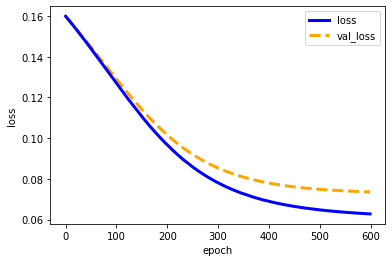

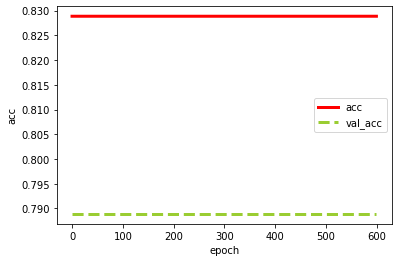

In [10]:
#以下で損失関数のグラフを描画
val_loss,=plt.plot(history.history["val_loss"],c="orange",ls="--",linewidth=3)
loss,=plt.plot(history.history["loss"],c="blue",linewidth=3)
plt.legend([loss,val_loss],["loss","val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
#accuracyをグラフ化
val_acc,=plt.plot(history.history["val_acc"],c="yellowgreen",ls="--",linewidth=3)
acc,=plt.plot(history.history["acc"],c="red",linewidth=3)
plt.legend([acc,val_acc],["acc","val_acc"])
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()